Importação de bibliotecas

In [16]:
# Importação das bibliotecas padrões
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importação de pacote para não ficar aparecendo alertas que não impactam a execução do código
import warnings
warnings.filterwarnings('ignore')

# Comando para não exibir os números em notação científica
pd.set_option('display.float_format', lambda x: '%.1f' % x)

Criação de Funções

In [24]:
#Criação de Funções para Realizar Análises Iniciais

## Identificar tamanho do dataframe
def dimensoes_dataset(data_frame):
    print('Este dataframe possui ' + str(data_frame.shape[0]) + ' linhas e ' + str(data_frame.shape[1]) + ' colunas.') 

## Criar um sumário do dataset, descrevendo quantos valores nulos e dtype de cada coluna
def descrever_dataframe(data_frame):
    data_frame.info()

## Identificar linhas duplicadas
def contar_linhas_duplicadas(data_frame):
    contar_duplicidades = data_frame.duplicated().sum()
    if contar_duplicidades == 0:
        return True
    return False

## Identificar valores nulos
def contar_valores_nulos(data_frame):
    'Quantidade de valores nulos identificados:'
    return 
    df_contagem_nulos = data_frame.isna().sum().to_frame(name='Contagem_Nulos')
    df_contagem_nulos[df_contagem_nulos['Contagem_Nulos'] > 0].sort_values(ascending =  False)

## Função para formatar os números
def formatar_numero(x):
    return f'{x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

### Configurando a exibição para evitar notação científica e usar o formato desejado
pd.set_option('display.float_format', formatar_numero)

Importar base de dados

In [22]:
df = pd.read_csv('high_diamond_ranked_10min.csv')
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,"6,8",17047,197,55,-643,8,"19,7","1.656,7"
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,"6,8",17438,240,52,2908,1173,"24,0","1.762,0"
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,"6,8",17254,203,28,1172,1033,"20,3","1.728,5"
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,"7,0",17961,235,47,1321,7,"23,5","1.647,8"
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,"7,0",18313,225,67,1004,-230,"22,5","1.740,4"


In [5]:
dimensoes_dataset(df)

Este dataframe possui 9879 linhas e 40 colunas.


In [6]:
descrever_dataframe(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [7]:
contar_linhas_duplicadas(df)


True

In [8]:
contar_valores_nulos(df)

In [10]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [34]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gameId,"9.879,00","4.500.084.044,85","27.573.278,49","4.295.358.071,00","4.483.301.169,00","4.510.920.346,00","4.521.733.208,50","4.527.990.640,00"
blueWins,"9.879,00","0,50","0,50","0,00","0,00","0,00","1,00","1,00"
blueWardsPlaced,"9.879,00","22,29","18,02","5,00","14,00","16,00","20,00","250,00"
blueWardsDestroyed,"9.879,00","2,82","2,17","0,00","1,00","3,00","4,00","27,00"
blueFirstBlood,"9.879,00","0,50","0,50","0,00","0,00","1,00","1,00","1,00"
blueKills,"9.879,00","6,18","3,01","0,00","4,00","6,00","8,00","22,00"
blueDeaths,"9.879,00","6,14","2,93","0,00","4,00","6,00","8,00","22,00"
blueAssists,"9.879,00","6,65","4,06","0,00","4,00","6,00","9,00","29,00"
blueEliteMonsters,"9.879,00","0,55","0,63","0,00","0,00","0,00","1,00","2,00"
blueDragons,"9.879,00","0,36","0,48","0,00","0,00","0,00","1,00","1,00"


In [30]:
print(((df['blueWins'].sum() / df.shape[0])*100).round(2))

49.9


Text(0.5, 1.0, 'Win rate Blue Side')

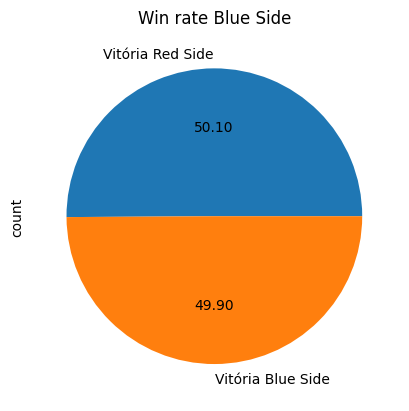

In [48]:
df.blueWins.map({1:'Vitória Blue Side', 0:'Vitória Red Side'}).value_counts().plot(kind='pie', autopct='%.2f')
plt.title('Win rate Blue Side')


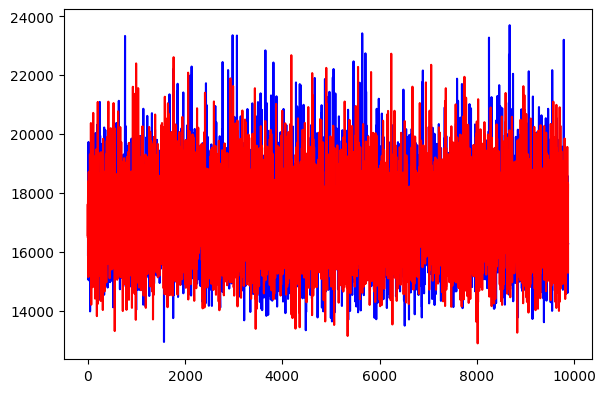

In [51]:
# Grid de gráficos

# Parâmetros
linhas = 2
colunas = 2

cs_blueside = df['blueTotalGold'].loc[df['blueWins'] == 1]
cs_redside = df['redTotalGold'].loc[df['blueWins'] == 0]

plt.figure(figsize=(15,10))
plt.subplot(linhas, colunas, 1)
plt.plot(cs_blueside, color=  'blue')
plt.plot(cs_redside, color=  'red')

In [ ]:
# #Separar os dados
# eixo_x = base_dados['total_bill']
# eixo_y = base_dados['tip']